## Two Equations Two unknowns

$$
\begin{cases}
3x + 2y = 12 \\
x - y = 1
\end{cases}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## The row picture

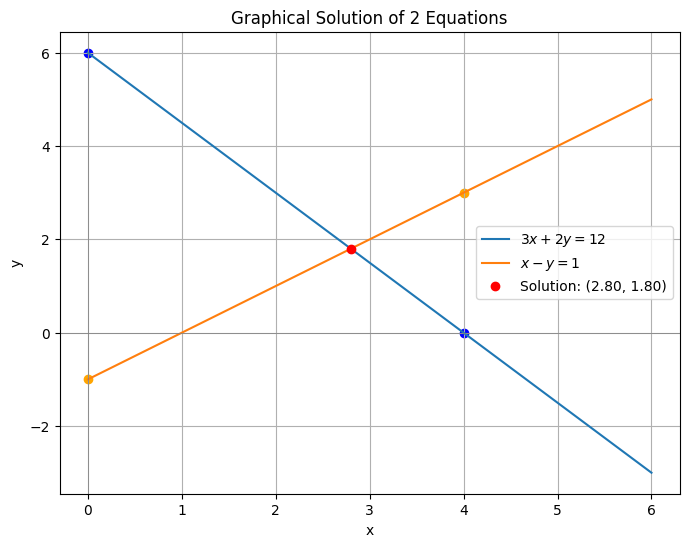

In [2]:
# Define the equations:
# Equation 1: 3x + 2y = 12  →  y = (12 - 3x) / 2
# Equation 2: x - y = 1     →  y = x - 1

# Define x range
x_vals = np.linspace(0, 6, 100)

# Equation 1 line
y1 = (12 - 3*x_vals) / 2

# Equation 2 line
y2 = x_vals - 1

# Solve the system algebraically
# 3x + 2y = 12
# x - y = 1
# Convert to matrix form: Ax = b
A = np.array([[3, 2], [1, -1]])
b = np.array([12, 1])

solution = np.linalg.solve(A, b)
x_sol, y_sol = solution

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1, label=r'$3x + 2y = 12$')
plt.plot(x_vals, y2, label=r'$x - y = 1$')
plt.plot(x_sol, y_sol, 'ro', label=f'Solution: ({x_sol:.2f}, {y_sol:.2f})')

# Two points per line
# For Equation 1
x1_points = [0, 4]
y1_points = [(12 - 3*x)/2 for x in x1_points]
plt.scatter(x1_points, y1_points, color='blue')

# For Equation 2
x2_points = [0, 4]
y2_points = [x - 1 for x in x2_points]
plt.scatter(x2_points, y2_points, color='orange')

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Solution of 2 Equations')
plt.legend()
plt.grid(True)
plt.show()

- What This Does:
> * Plots both equations using a wide x-range.
> * Shows 2 distinct points for each line.
> * Computes the exact intersection using `np.linalg.solve`.
> * Highlights the solution on the graph.

---

### 3 Equations and 3 Unknowns:

We’ll solve this system:

$$
\begin{aligned}
x + y + z &= 6 \quad \text{(Eq1)} \\
2x - y + z &= 3 \quad \text{(Eq2)} \\
x + 2y - z &= 4 \quad \text{(Eq3)}
\end{aligned}
$$

---

Solution: x = 1.57, y = 2.29, z = 2.14


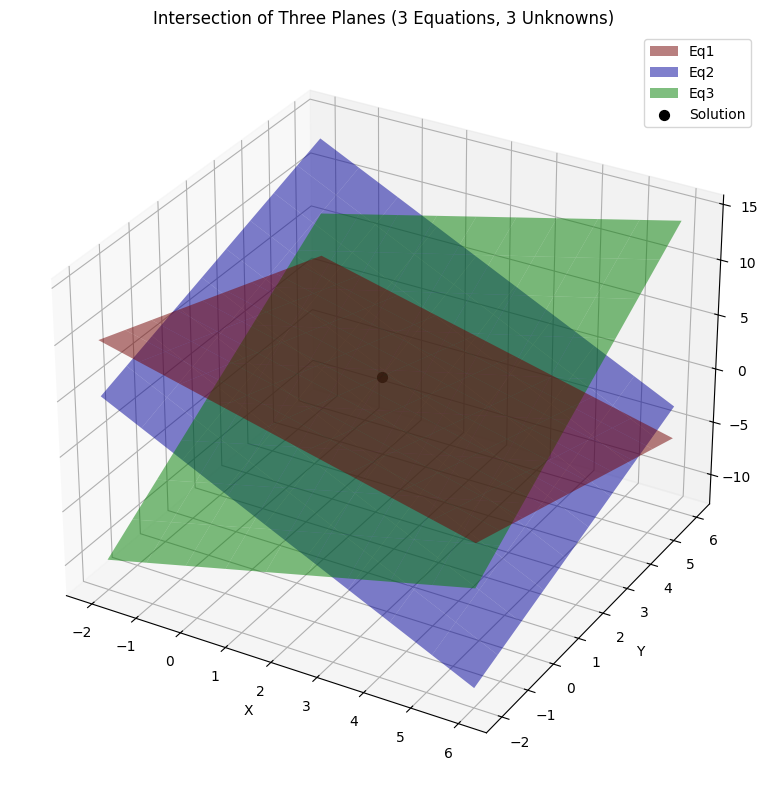

In [4]:
# Define coefficient matrix A and RHS vector b
A = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [1, 2, -1]
])
b = np.array([6, 3, 4])

# Solve the system
solution = np.linalg.solve(A, b)
x_sol, y_sol, z_sol = solution

print(f"Solution: x = {x_sol:.2f}, y = {y_sol:.2f}, z = {z_sol:.2f}")

# Create a meshgrid for x and y
x_vals = np.linspace(-2, 6, 10)
y_vals = np.linspace(-2, 6, 10)
X, Y = np.meshgrid(x_vals, y_vals)

# Define the planes by solving for z in each equation
Z1 = 6 - X - Y               # From Eq1: x + y + z = 6
Z2 = 3 - 2*X + Y             # From Eq2: 2x - y + z = 3
Z3 = X + 2*Y - 4             # From Eq3: x + 2y - z = 4

# Plot the planes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z1, alpha=0.5, label='Eq1', color='red')
ax.plot_surface(X, Y, Z2, alpha=0.5, label='Eq2', color='blue')
ax.plot_surface(X, Y, Z3, alpha=0.5, label='Eq3', color='green')

# Plot the intersection point
ax.scatter(x_sol, y_sol, z_sol, color='black', s=50, label='Solution')

# Label and show
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Intersection of Three Planes (3 Equations, 3 Unknowns)')
ax.legend()
plt.tight_layout()
plt.show()


* Each plane is plotted semi-transparent.
* The intersection point is highlighted in black.
* This example uses a system with a **unique solution**, but you can change the coefficients to explore other possibilities.

## The Column picture

$$
\begin{aligned}
3x + 2y &= 12 \\
x - y &= 1
\end{aligned}
$$

In matrix form:

$$
A \cdot \vec{x} = \vec{b}, \quad \text{where} \quad A = 
\begin{bmatrix}
3 & 2 \\
1 & -1
\end{bmatrix}, \quad \vec{x} = 
\begin{bmatrix}
x \\
y
\end{bmatrix}, \quad \vec{b} = 
\begin{bmatrix}
12 \\
1
\end{bmatrix}
$$

---

Solution: x = 2.80, y = 1.80


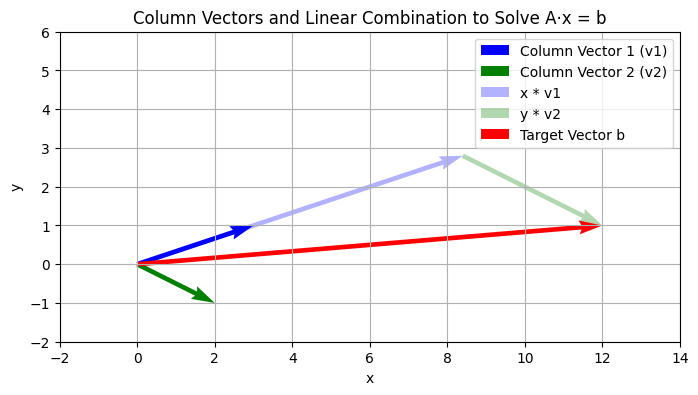

In [6]:
# 1. Treats the **column-wise coefficients** of the system as vectors.
# 2. **Visualizes them as arrows** (vectors) from the origin.
# 3. Solves the system using linear algebra (i.e. finds the vector of unknowns `x`, `y`).
# 4. Draws the **linear combination** of the column vectors scaled by the solution.


# Coefficient matrix (columns as vectors)
A = np.array([[3, 2],
              [1, -1]])

# Right-hand side vector
b = np.array([12, 1])

# Solve the system A·x = b
solution = np.linalg.solve(A, b)
x_sol, y_sol = solution

print(f"Solution: x = {x_sol:.2f}, y = {y_sol:.2f}")

# Extract column vectors (basis vectors)
v1 = A[:, 0]  # Column 1
v2 = A[:, 1]  # Column 2

# Scaled versions of the column vectors
v1_scaled = x_sol * v1
v2_scaled = y_sol * v2
result_vector = v1_scaled + v2_scaled  # Should equal b

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original column vectors
ax.quiver(0, 0, *v1, angles='xy', scale_units='xy', scale=1, color='blue', label='Column Vector 1 (v1)')
ax.quiver(0, 0, *v2, angles='xy', scale_units='xy', scale=1, color='green', label='Column Vector 2 (v2)')

# Plot the scaled vectors from origin
ax.quiver(0, 0, *v1_scaled, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.3, label='x * v1')
ax.quiver(*v1_scaled, *v2_scaled, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.3, label='y * v2')

# Final target vector (b)
ax.quiver(0, 0, *b, angles='xy', scale_units='xy', scale=1, color='red', label='Target Vector b')

# Plot settings
ax.set_xlim(-2, max(13, b[0]) + 1)
ax.set_ylim(-2, max(5, b[1]) + 1)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Column Vectors and Linear Combination to Solve A·x = b')
ax.legend()
plt.show()


#### What This Illustrates:

* Each column of `A` is a basis vector.
* The solution scales them (`x`, `y`) to get `b` via linear combination:

  $$
  b = x \cdot v_1 + y \cdot v_2
  $$
* The plot visually confirms that the scaled sum matches `b`.

Let me know if you want a version for 3D (3×3 system) or animated step-by-step scaling!

---

### The 3 equation example

$$
\begin{aligned}
x + y + z &= 6 \\
2x - y + z &= 3 \\
x + 2y - z &= 4
\end{aligned}
$$

Matrix form:

$$
A =
\begin{bmatrix}
1 & 1 & 1 \\
2 & -1 & 1 \\
1 & 2 & -1
\end{bmatrix}, \quad
b =
\begin{bmatrix}
6 \\
3 \\
4
\end{bmatrix}
$$

---

Solution:
x = 1.57, y = 2.29, z = 2.14


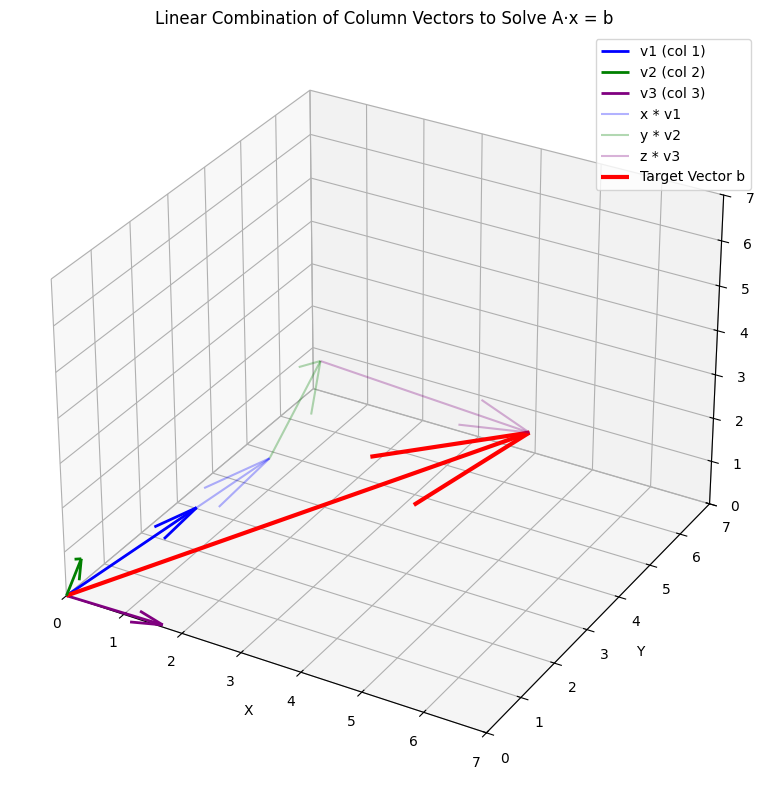

In [7]:
# * Uses the **columns of a 3×3 matrix** (i.e., the coefficient matrix) as **vectors** in 3D space.
# * Solves the system `A · x = b` for 3 equations and 3 unknowns.
# * Visualizes:

#   * The **three original column vectors** of the matrix.
#   * Their **scaled versions** based on the solution.
#   * The **resulting vector `b`**.


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coefficient matrix A and vector b
A = np.array([[1, 1, 1],
              [2, -1, 1],
              [1, 2, -1]])

b = np.array([6, 3, 4])

# Solve for x (x, y, z)
solution = np.linalg.solve(A, b)
x_sol, y_sol, z_sol = solution
print(f"Solution:\nx = {x_sol:.2f}, y = {y_sol:.2f}, z = {z_sol:.2f}")

# Extract column vectors
v1 = A[:, 0]  # vector for x
v2 = A[:, 1]  # vector for y
v3 = A[:, 2]  # vector for z

# Scaled vectors
v1_scaled = x_sol * v1
v2_scaled = y_sol * v2
v3_scaled = z_sol * v3

# Final result (should equal b)
linear_combination = v1_scaled + v2_scaled + v3_scaled

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original column vectors
ax.quiver(0, 0, 0, *v1, color='blue', label='v1 (col 1)', linewidth=2)
ax.quiver(0, 0, 0, *v2, color='green', label='v2 (col 2)', linewidth=2)
ax.quiver(0, 0, 0, *v3, color='purple', label='v3 (col 3)', linewidth=2)

# Plot scaled vectors (building up from origin)
ax.quiver(0, 0, 0, *v1_scaled, color='blue', alpha=0.3, label='x * v1')
ax.quiver(*v1_scaled, *v2_scaled, color='green', alpha=0.3, label='y * v2')
ax.quiver(*(v1_scaled + v2_scaled), *v3_scaled, color='purple', alpha=0.3, label='z * v3')

# Plot the result vector b
ax.quiver(0, 0, 0, *b, color='red', linewidth=3, label='Target Vector b')

# Axis settings
ax.set_xlim([0, max(7, b[0]+1)])
ax.set_ylim([0, max(7, b[1]+1)])
ax.set_zlim([0, max(7, b[2]+1)])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Linear Combination of Column Vectors to Solve A·x = b')
ax.legend()
plt.tight_layout()
plt.show()


#### What You See:

* **Blue, green, purple vectors**: original columns of `A`.
* **Transparent versions**: scaled by solution `x`, `y`, `z`.
* **Red vector**: target `b`, reconstructed from the sum.

# Final Note:

In solving a system of **linear equations** with `n` equations and `n` unknowns, we're essentially trying to find the unique point (or points) in **n-dimensional space** where all these **n hyperplanes** intersect. The context you've described touches on a **critical linear algebra principle**:

> A system of `n` linear equations in `n` unknowns **might not** have a solution if the equations are not sufficiently independent or do not fully constrain the space.

---

### 📐 Example: "Having 9-dimensional space but only 8 or 9 planes"

Let’s unpack this.

#### ✅ Key Concepts:

* Each **linear equation** in `n` variables represents an `(n-1)`-dimensional **hyperplane** in `n`-dimensional space.
* The **solution** is the **intersection** of all these hyperplanes.
* For a **unique solution** to exist, the system must:

  1. Be **consistent** (the hyperplanes intersect at a common point),
  2. Have **linearly independent** equations (none is a combination of the others).

---

### 🚫 What Goes Wrong?

#### Case 1: **Less than `n` equations**

* If you have **9 unknowns** but only **8 equations**, you're intersecting **8 hyperplanes in 9D**.
* The best you can get is a **1D line of solutions** — **underdetermined** system.
* Analogy: In 3D, two planes intersect in a line unless they're parallel.

#### Case 2: **`n` equations but not independent**

* Even if you have **9 equations in 9 unknowns**, the system can still **fail to solve uniquely** if one or more equations are **linearly dependent** (e.g., a copy or combination of others).
* This again leads to **infinite solutions** or **no solution**, depending on whether the hyperplanes intersect at all.

---

### 🧮 Visual Analogy (Lower Dimensions)

#### In 2D:

* 1 equation in 2 unknowns = a line
* 2 independent equations = intersect at a point → ✅ solution
* 2 same or parallel equations = infinite/no solutions → ❌

#### In 3D:

* 1 equation = a plane
* 2 planes = intersect in a line
* 3 planes can:

  * Intersect at a point ✅
  * Intersect in a line ❌
  * Be inconsistent ❌
